## Amazon Gaming Computers: Exploratory Data Analysis

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [353]:
df = pd.read_csv("amazon_gaming_desktops_cleaned1.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [354]:
df.head()

,Product Name,Avg. Rating,# Ratings,Price,Processor Type,Disk Size,RAM,Processor Speed,Brand,Bluetooth,Liq. Cooled,RAM: Type,RAM : GB,Processor Speed: GHz,Disk Size: GB
0,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0/0,0,8679.0,Intel Core i7,8 TB,64 GB,3.60 GHz,MSI,0,0,GB,64.0,3.6,8000.0 GB
1,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0/0,0,8589.0,Intel Core i7,16 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,16000.0 GB
2,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0/0,0,8589.0,Intel Core i7,8 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,8000.0 GB
3,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0/0,0,8569.0,Intel Core i7,16 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,16000.0 GB
4,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0/0,0,8569.0,Intel Core i7,8 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,8000.0 GB


In [355]:
df.shape

(3805, 15)

In [356]:
df.describe()

,# Ratings,Price,Bluetooth,Liq. Cooled,RAM : GB,Processor Speed: GHz
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000
mean,15.363732,2403.614452,0.259658,0.202628,51.463342,3.370001
std,135.664917,1486.369880,0.438505,0.402010,1037.650211,0.621210
min,0.000000,314.990000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1399.990000,0.000000,0.000000,16.000000,3.000000
50%,0.000000,1999.110000,0.000000,0.000000,32.000000,3.500000
75%,0.000000,3299.990000,1.000000,0.000000,32.000000,3.700000
max,4433.000000,8679.000000,1.000000,1.000000,64000.000000,5.300000


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product Name          3805 non-null   object 
 1   Avg. Rating           3805 non-null   object 
 2   # Ratings             3805 non-null   int64  
 3   Price                 3805 non-null   float64
 4   Processor Type        3805 non-null   object 
 5   Disk Size             3805 non-null   object 
 6   RAM                   3805 non-null   object 
 7   Processor Speed       3805 non-null   object 
 8   Brand                 3805 non-null   object 
 9   Bluetooth             3805 non-null   int64  
 10  Liq. Cooled           3805 non-null   int64  
 11  RAM: Type             3805 non-null   object 
 12  RAM : GB              3805 non-null   float64
 13  Processor Speed: GHz  3805 non-null   float64
 14  Disk Size: GB         3805 non-null   object 
dtypes: float64(3), int64(

Let's start exploring the data by asking a few questions: first, <b>What are the price differences between Processor Types?</b>

For the sake of having a clean plot, we'll only take the most common processor types. Then we'll order the chosen ones in their inherent order.

In [358]:
df['Processor Type'].value_counts()

Intel Core i7       1424
Intel Core i5        697
Intel Core i9        573
AMD R Series         444
Ryzen 7              254
Ryzen 5              169
Ryzen 9              107
other                 54
Intel Core i3         38
AMD A Series          10
Ryzen 3                9
Intel Xeon             5
core_m                 4
Intel Mobile CPU       3
Athlon                 3
Pentium                3
Core 2                 3
Celeron                2
Celeron N4000          1
AMD A8                 1
Apple A6               1
Name: Processor Type, dtype: int64

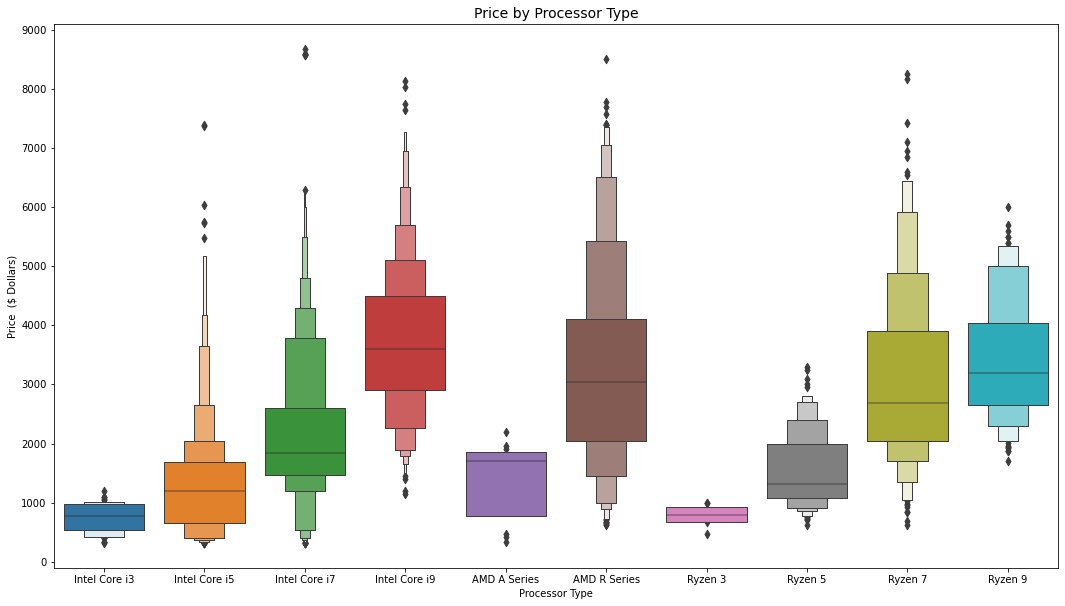

In [359]:
common_procs = ['Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Core i9', 'AMD R Series', 'AMD A Series', 'Ryzen 3', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9']
plt.figure(figsize=(18,10))
ax = plt.gca()
#ax.set_facecolor('lightgrey')
sns.boxenplot(data=df[df['Processor Type'].isin(common_procs)], x='Processor Type', y='Price', order=['Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Core i9', 'AMD A Series', 'AMD R Series', 'Ryzen 3', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9'])
plt.title('Price by Processor Type', fontsize=14)
plt.ylabel('Price  ($ Dollars)')
plt.yticks(ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
plt.show()

As expected, we can see that the price increases as the model of processor type improves (or modernizes, whichever word you would like to use). We can see some of the processors have outliers. A clear example would be the Intel Core i5, with some examples reaching similar prices to the outliers of the i7 or even beyond the inner-quartile range of the i9.

<b>What is the distribution of Price?</b>

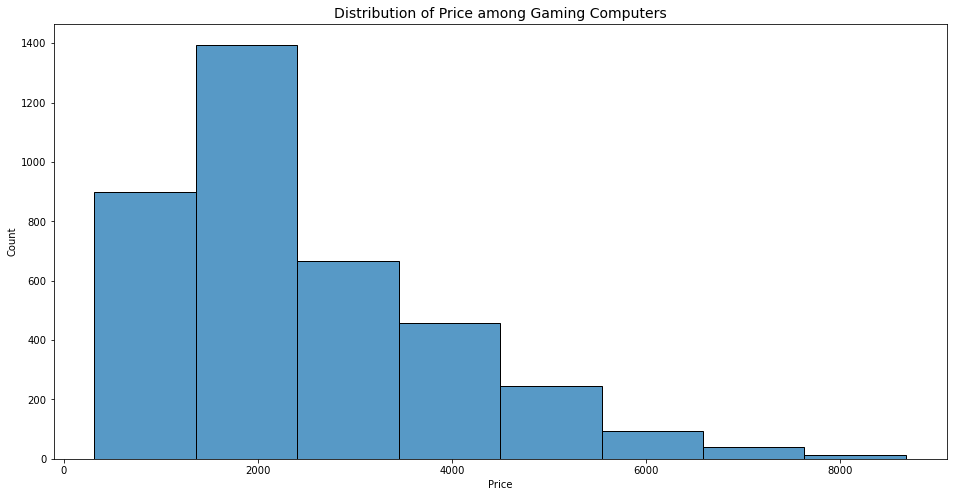

In [360]:
plt.figure(figsize=(16,8))
sns.histplot(data=df, x='Price', bins=8)
plt.title('Distribution of Price among Gaming Computers', fontsize=14)
plt.show()

So our dependent variable, price, has some right-skewness. We'll keep this in mind as we more forward.

Next we'll look at <b>how the price differs between the amount of RAM a computer has.</b> There are some clear outliers within the RAM category, so we'll have to plot the values that make realistic sense.

In [361]:
df['RAM : GB'].value_counts()

32.000000       1198
16.000000       1025
64.000000        658
8.000000         459
24.000000        179
128.000000       171
0.000000          43
12.000000         33
4.000000          17
256.000000         8
10.000000          3
2.000000           3
1000.000000        2
48.000000          1
512.000000         1
6.000000           1
64000.000000       1
0.000008           1
0.016000           1
Name: RAM : GB, dtype: int64

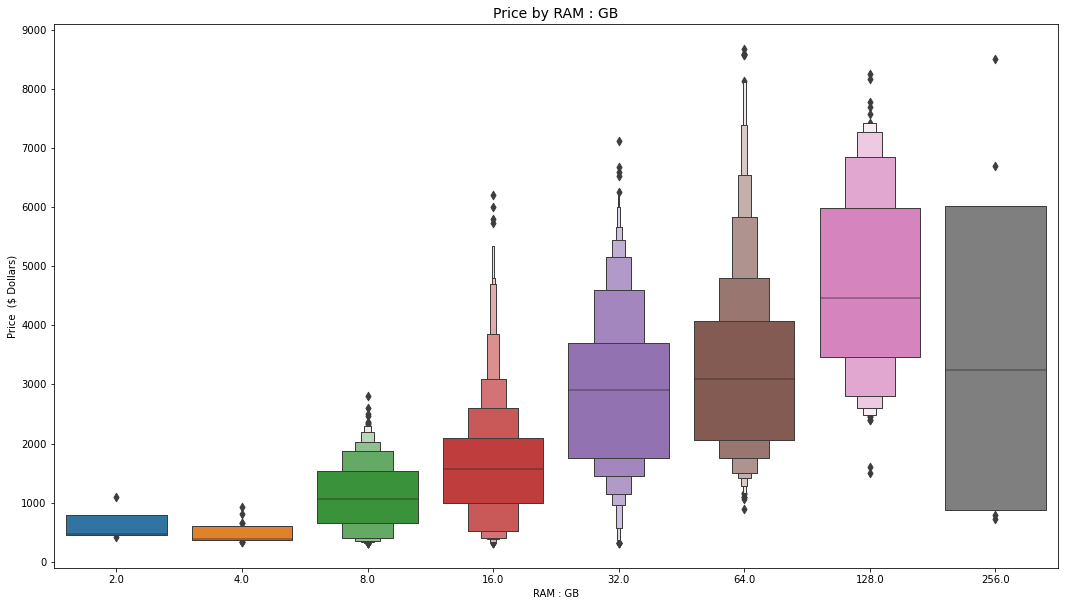

In [362]:
comp_ram = [2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]
plt.figure(figsize=(18,10))
ax = plt.gca()
#ax.set_facecolor('lightgrey')
sns.boxenplot(data=df[df['RAM : GB'].isin(comp_ram)], x='RAM : GB', y='Price', order=[2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0])
plt.title('Price by RAM : GB', fontsize=14)
plt.ylabel('Price  ($ Dollars)')
plt.yticks(ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
plt.show()

We can verify that with RAM (in powers of 2), the price increases in correlation with more powerful RAM. 256GB of RAM only has few records, so we'll have to keep in mind the integrity of its column here in the graph.

We can see 16GB of RAM has some outliers, as well as 64. These values along with 32 round out the most common RAM amounts.

Next, I want to look at the <b>distribution of Processor Speed (in GHz) as well as its influence on Price.</b>

In [363]:
df['Processor Speed: GHz'].value_counts()

3.6000    808
3.2000    449
3.7000    412
2.5000    338
3.8000    319
3.4000    256
3.0000    253
2.9000    224
3.5000    146
3.9000    103
2.6000    101
4.6000     29
0.0000     29
3.3000     28
4.8000     27
4.0000     23
4.9000     21
3.1000     20
5.1000     20
4.1000     20
2.4000     19
2.8000     18
5.2000     16
4.7000     16
4.3000     15
5.0000     12
5.3000     12
4.4000     11
2.0000      9
4.5000      7
4.2000      6
1.8000      6
2.2000      5
1.6000      5
2.7000      5
2.1000      4
2.3000      4
1.4000      2
4.3900      1
0.0036      1
3.4600      1
1.0000      1
2.6660      1
1.3000      1
2.9330      1
Name: Processor Speed: GHz, dtype: int64

After doing a little research, I found that as the GHz value increases, the computer can run faster but the CPU can heat up quickly. Therefore I decided to include the Liquid Cooling attribute in the hue to further discern between these attributes.

With outliers aside, along with the 0 values in our dataset which will potentially be removed, we can see where the common range of values are for Processor Speed. We can also see that in general the computers that are liquid cooled are priced a bit higher regardless of the GHz of a computer.

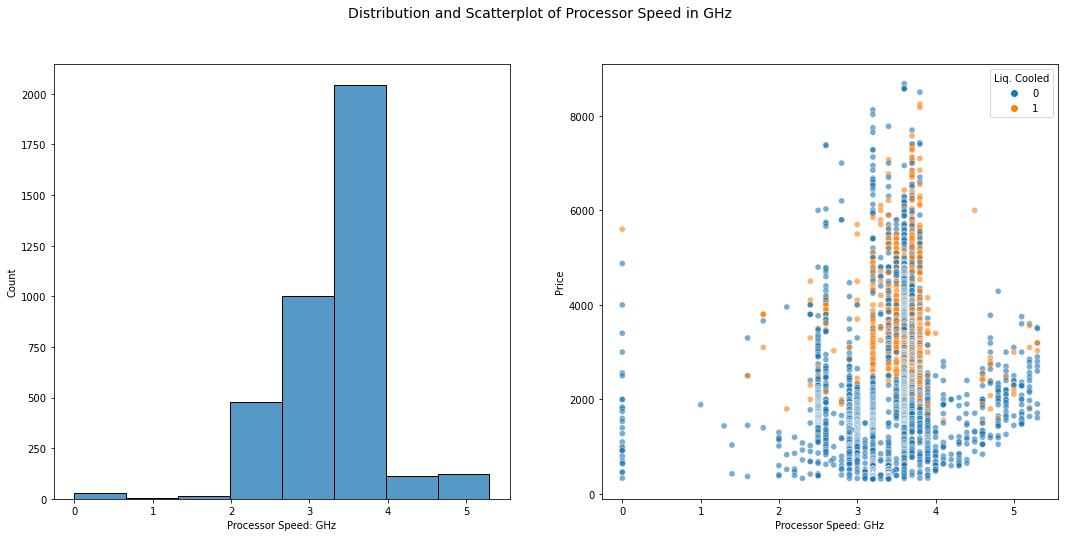

In [364]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
sns.histplot(data=df, x='Processor Speed: GHz', bins=8, ax=ax1)
sns.scatterplot(data=df, x='Processor Speed: GHz', y='Price', hue='Liq. Cooled', ax=ax2, alpha=0.6)
plt.suptitle('Distribution and Scatterplot of Processor Speed in GHz', fontsize=14)
plt.show()

In [365]:
#We can quickly get a new column by taking the first value as the float data type.
def disk_split(x):
    
    splited = x.split(' ')
    
    return float(splited[0])

df['Disk Size: GB'] = df['Disk Size: GB'].apply(disk_split)

In [366]:
df['Disk Size: GB'].dtype

dtype('float64')

Now we'll take a look at the <b>Disk Size of a computer (in GB) with respect to the price of the computer.</b>

We'll have to correct the distribution a little since we have some extreme outliers (one record has over 500000).

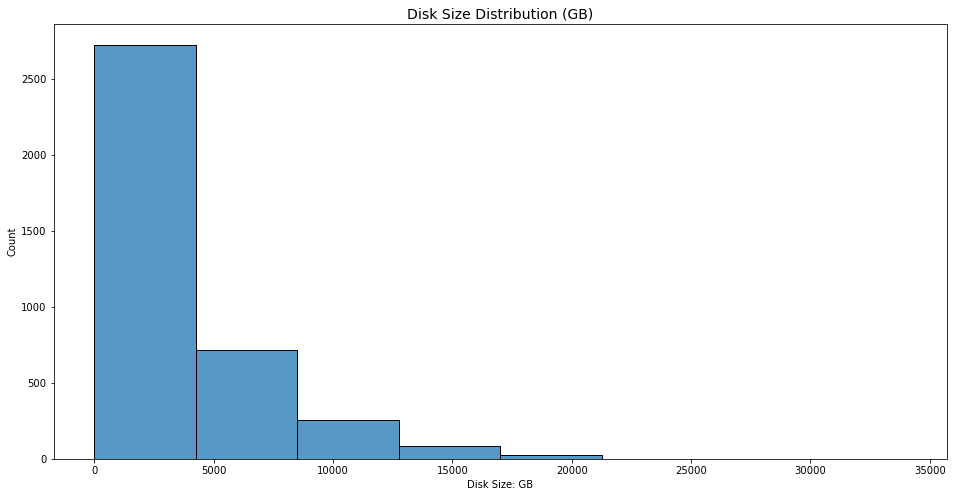

In [367]:
plt.figure(figsize=(16,8))
sns.histplot(data=df[df['Disk Size: GB']<100000], x='Disk Size: GB', bins=8)
plt.title('Disk Size Distribution (GB)', fontsize=14)
plt.show()

In [368]:
df['Brand'].value_counts()
chosen_brands = ['Dell', 'Adamant', 'HP', 'Velztorm', 'MSI', 'Lenovo', 'CLX', 'SkyTech']
most_brands_df = df[df['Brand'].isin(chosen_brands)]

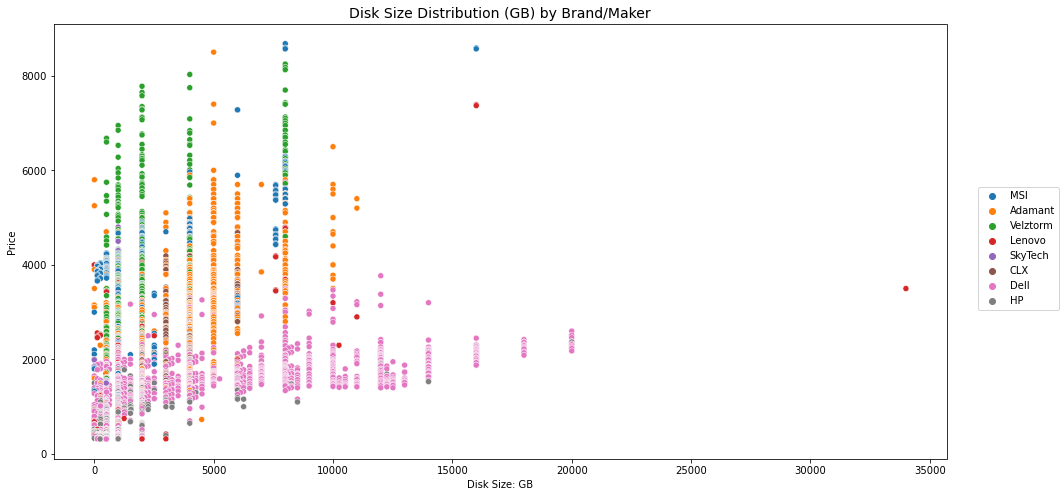

In [369]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data=most_brands_df[most_brands_df['Disk Size: GB']<500000], x='Disk Size: GB', y='Price', hue='Brand')
plt.title('Disk Size Distribution (GB) by Brand/Maker', fontsize=14)
plt.legend('',frameon=False)
fig.legend(loc=7)
#plt.set_cmap('Blues')
plt.show()

We can see that a lot of the price has a lot to do with Brand and not so much the disk size. This will be handy as we move into analyzing the various brands of computers.

Since the price can vary by processor type, <b>does the brand/maker of a computer add more influence to the price?</b> 

Again since we have some processor types with extremely few values, we'll select a certain amount of processor types.

In [370]:
most_brands_df[most_brands_df['RAM : GB']<500].shape #Eliminating the outliers from the graph

(3293, 15)

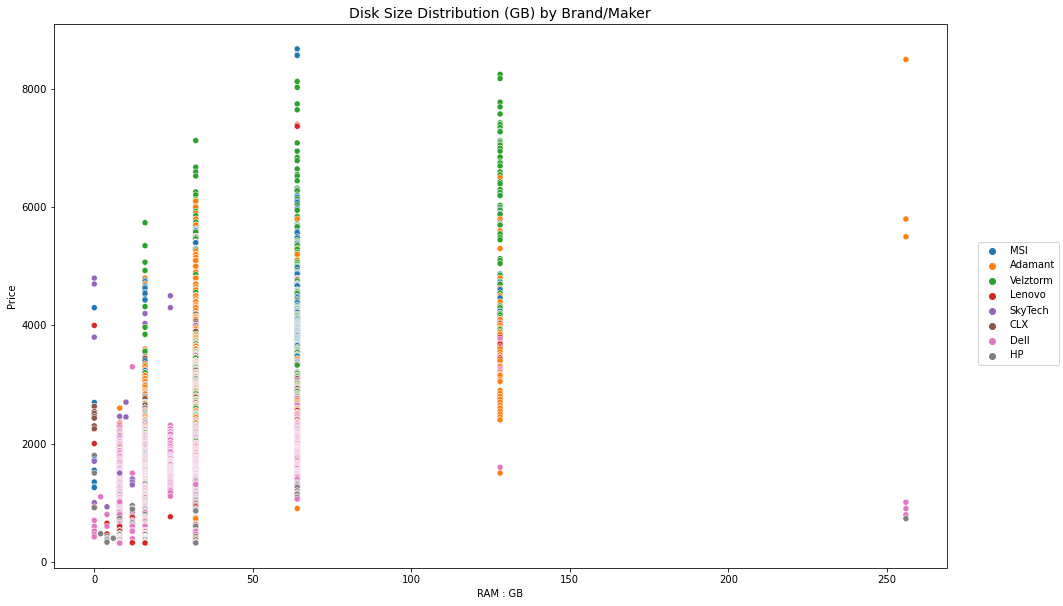

In [371]:
fig = plt.figure(figsize=(16,10))
sns.scatterplot(data=most_brands_df[most_brands_df['RAM : GB']<500], x='RAM : GB', y='Price', hue='Brand')
plt.title('Disk Size Distribution (GB) by Brand/Maker', fontsize=14)
plt.legend('',frameon=False)
fig.legend(loc=7)
plt.show()

We can see that makers like Velztorm make a higher priced computer with options at high RAM. While brands like Dell are cheaper in general, even at similar RAM amounts.

In [372]:
df['Processor Type'].value_counts()

Intel Core i7       1424
Intel Core i5        697
Intel Core i9        573
AMD R Series         444
Ryzen 7              254
Ryzen 5              169
Ryzen 9              107
other                 54
Intel Core i3         38
AMD A Series          10
Ryzen 3                9
Intel Xeon             5
core_m                 4
Intel Mobile CPU       3
Athlon                 3
Pentium                3
Core 2                 3
Celeron                2
Celeron N4000          1
AMD A8                 1
Apple A6               1
Name: Processor Type, dtype: int64

In [373]:
relevant_procs = ['Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Core i9', 'Ryzen 3', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9', 'AMD A Series', 'AMD R Series']

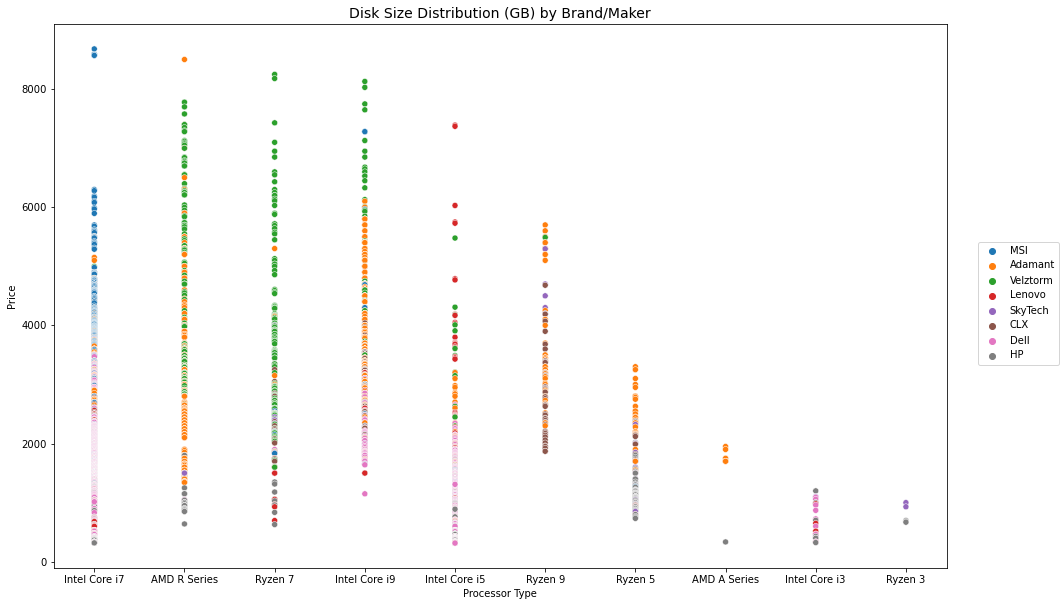

In [374]:
#Further filtering to get most relevant processors
procs_brands_df = most_brands_df[most_brands_df['Processor Type'].isin(relevant_procs)]

fig = plt.figure(figsize=(16,10))
sns.scatterplot(data=procs_brands_df[procs_brands_df['RAM : GB']<500], x='Processor Type', y='Price', hue='Brand')
plt.title('Disk Size Distribution (GB) by Brand/Maker', fontsize=14)
plt.legend('',frameon=False)
fig.legend(loc=7)
plt.show()

We can see that the more common processors have similar price ranges, yet they still differ in price in terms of brand. 

We can see that a lot of HP and Dell computers are at a lower price, yet for the same processor, brands liek MSI and Velztorm are more expensive. 

Are these price increases we see soley because of Brand?

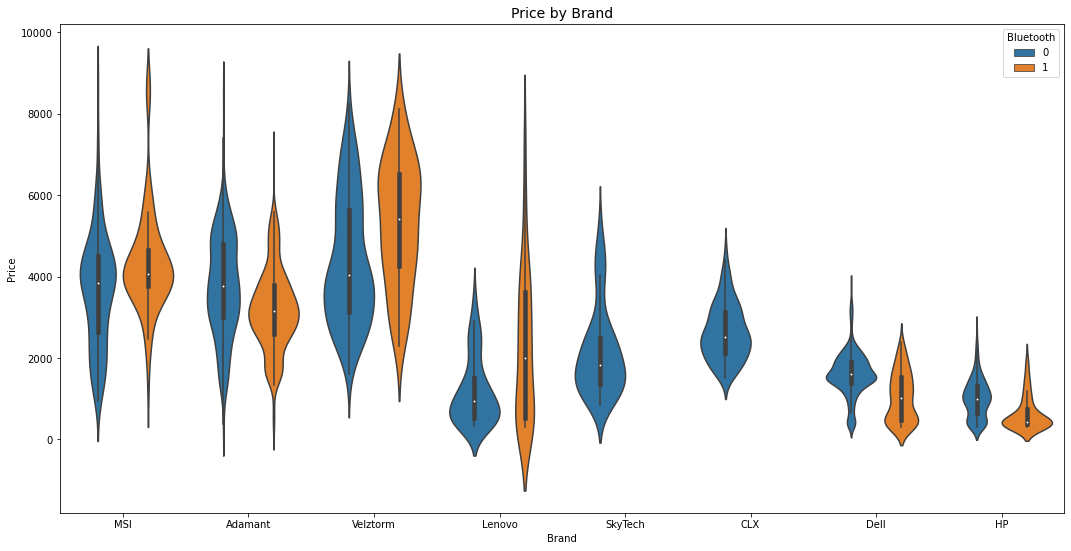

In [375]:
plt.figure(figsize=(18,9))
sns.violinplot(data=procs_brands_df, x='Brand', y='Price', hue='Bluetooth')
plt.title('Price by Brand', fontsize=14)
plt.show()

There are some clear differences in terms of price range. I included bluetooth here since we haven't examined that attriubte yet. For brands it makes a little difference. For some not as much.

The minimum price in the entire dataset is 314.99 as we saw from the call to describe at the beginning of the notebook, so it is interesting the range for Lenovo goes below zero.

In [376]:
procs_brands_df = procs_brands_df[procs_brands_df['Disk Size: GB']<100000]
procs_brands_df = procs_brands_df[procs_brands_df['RAM : GB']<1000.0]#filtering for analysis

<Figure size 1440x1008 with 0 Axes>

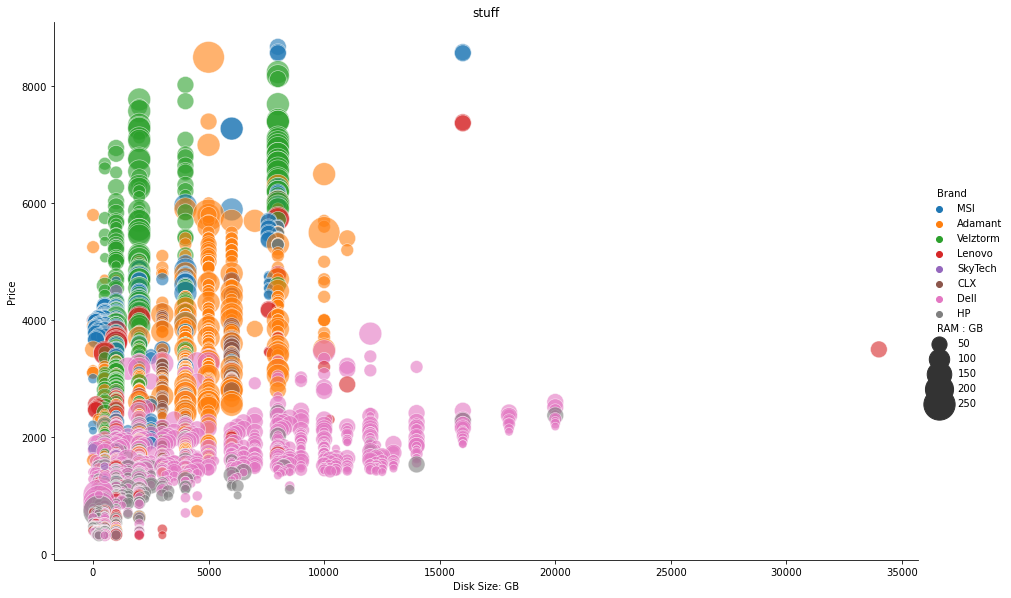

In [377]:
#reusing common RAM amounts, -> [2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]
plt.figure(figsize=(20,14))
sns.relplot(data=procs_brands_df[procs_brands_df['RAM : GB'].isin(comp_ram)], x='Disk Size: GB', y='Price', height=8, 
            sizes=(50, 1000), aspect=1.6, hue='Brand', size='RAM : GB', alpha=0.6)
plt.title('stuff')
plt.show()

So for the most part, even if we add additional dimensions, we see that mostly the price depends on the brand.

Therefore, we can try to make <b>subplots for each brand and see how attriubtes differ.</b>

In [378]:
picked_brands = procs_brands_df['Brand'].unique().tolist()

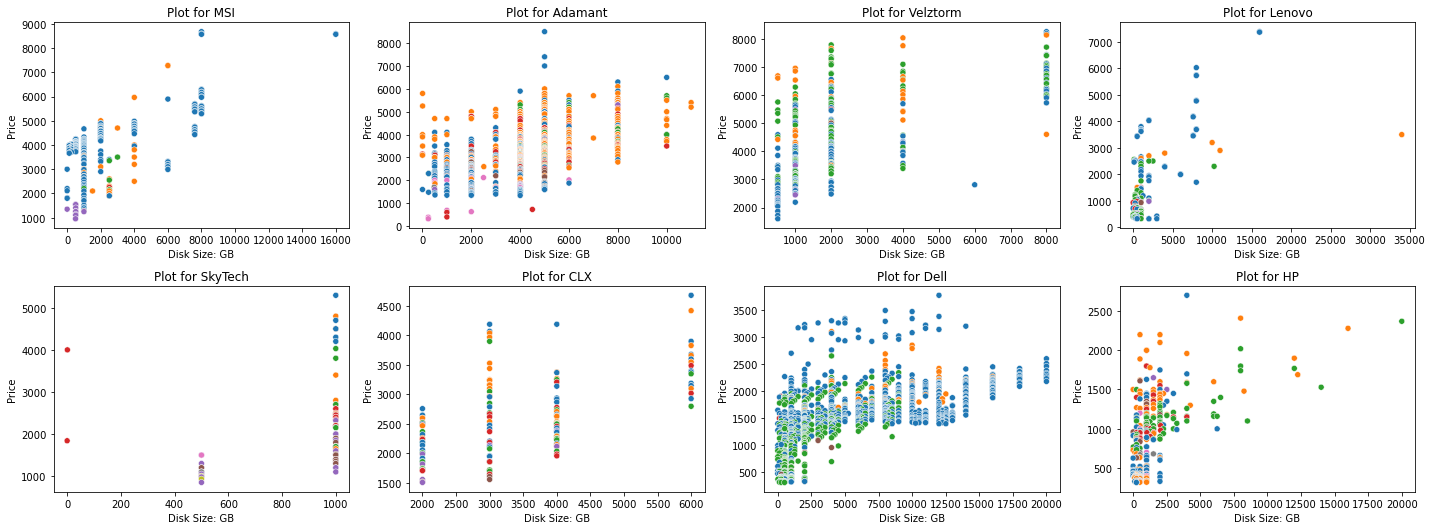

In [379]:
i = 1
plt.figure(figsize=(20,40))

for brand in picked_brands:
    plt.subplot(11,4,i)
    sns.scatterplot(x='Disk Size: GB', y='Price', data=procs_brands_df[procs_brands_df['Brand']==brand], hue='Processor Type')
    plt.title('Plot for {}'.format(brand))
    plt.legend('',frameon=False) #We simply want to see if there is a difference, so we can take off the legend
    plt.tight_layout()
    i = i + 1

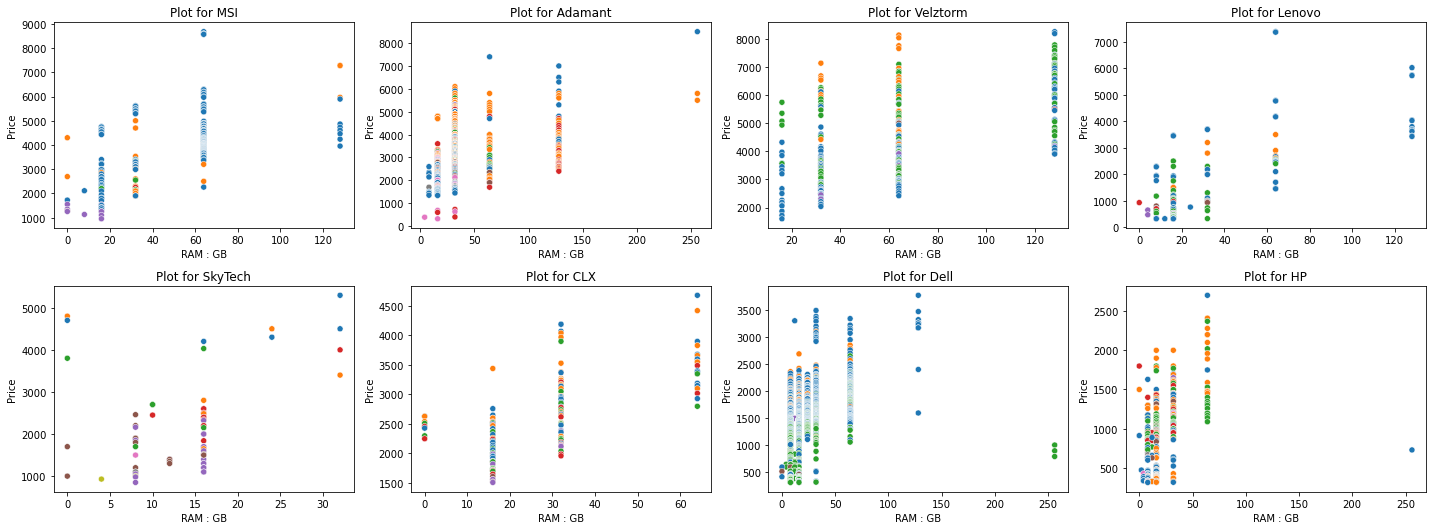

In [380]:
i = 1
plt.figure(figsize=(20,40))

for brand in picked_brands:
    plt.subplot(11,4,i)
    sns.scatterplot(x='RAM : GB', y='Price', data=procs_brands_df[procs_brands_df['Brand']==brand], hue='Processor Type')
    plt.title('Plot for {}'.format(brand))
    plt.legend('',frameon=False) #We simply want to see if there is a difference, so we can take off the legend
    plt.tight_layout()
    i = i + 1

We can get a better sense of any existing variation when we look at specific brands. No doubt when we attempt to make models we're going to need a lot of emphasis on outlier removal, since this dataset does have a lot of them.

<Figure size 1440x2880 with 0 Axes>

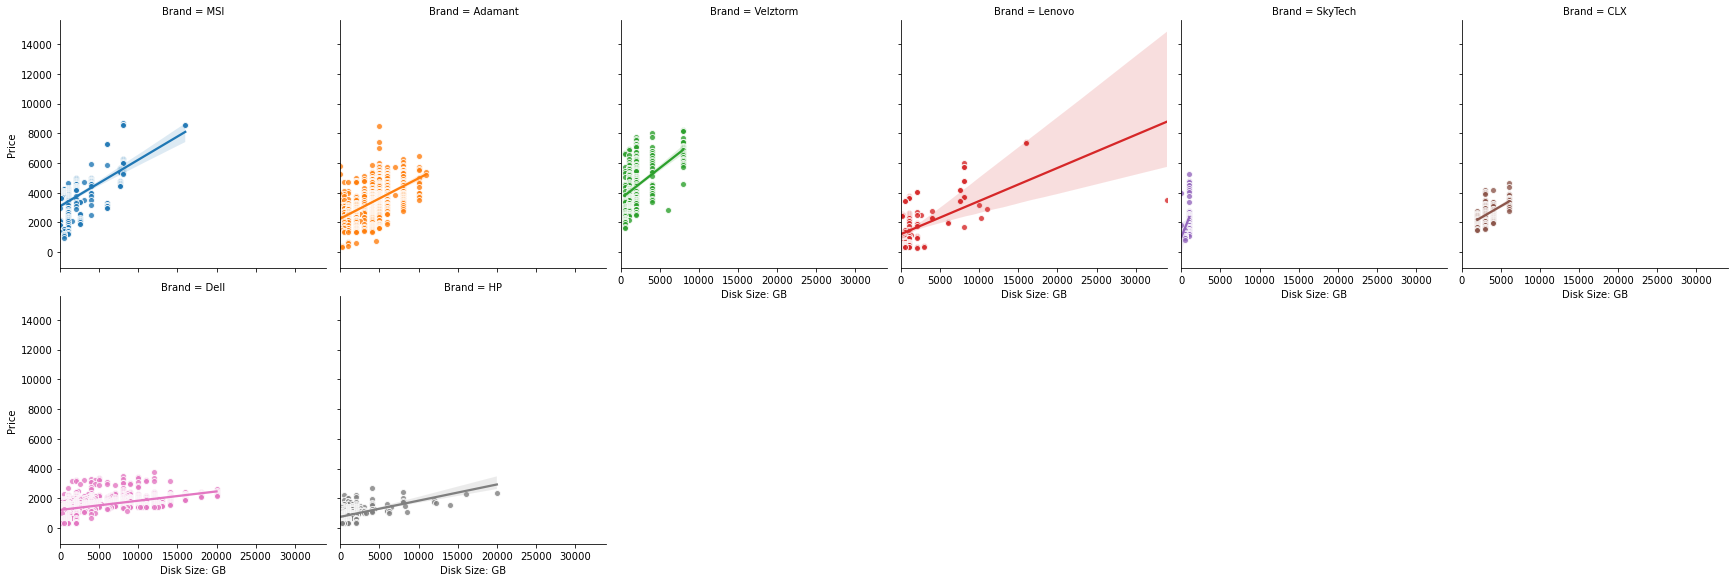

In [400]:
plt.figure(figsize=(20,40))
g = sns.lmplot(
    x='Disk Size: GB', y="Price", hue="Brand", col="Brand",
    data=procs_brands_df, scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4)
plt.show(g)

<Figure size 1440x2880 with 0 Axes>

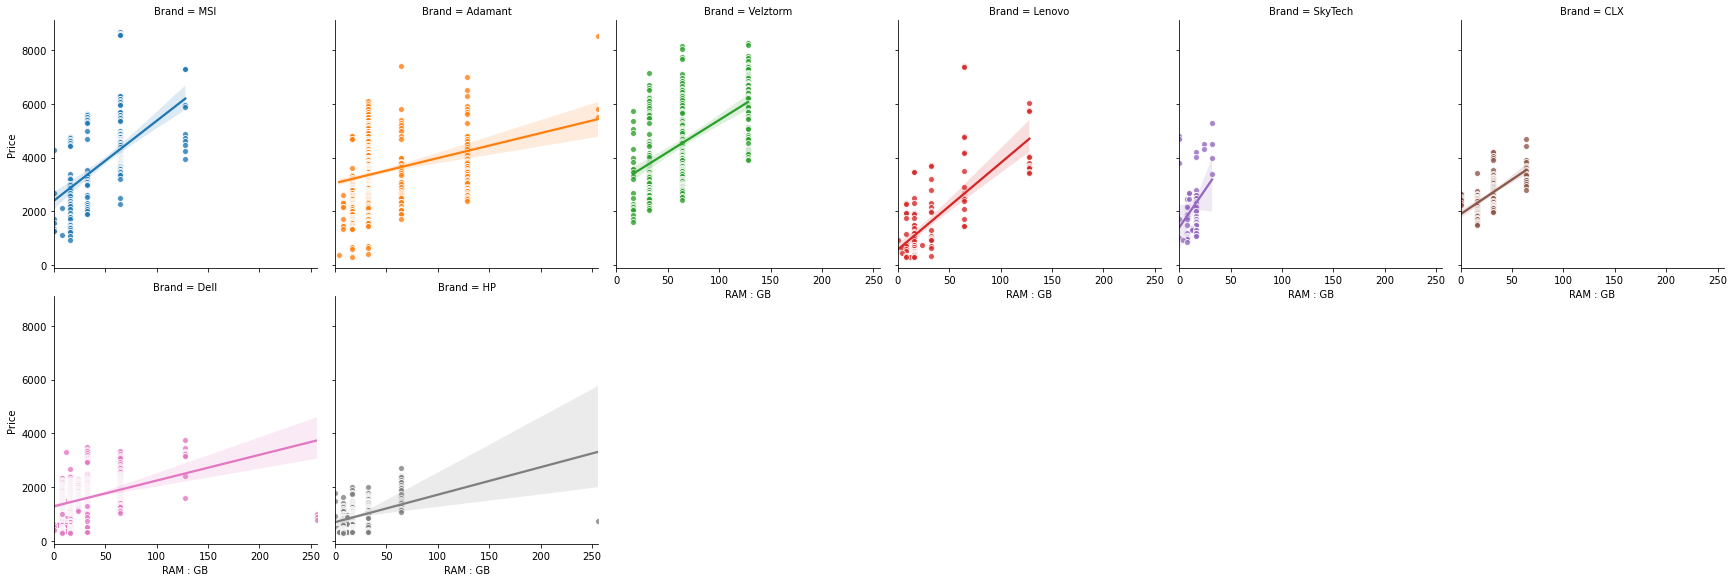

In [399]:
plt.figure(figsize=(20,40))
g = sns.lmplot(
    x='RAM : GB', y="Price", hue="Brand", col="Brand",
    data=procs_brands_df, scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4)
plt.show(g)

<Figure size 1440x2880 with 0 Axes>

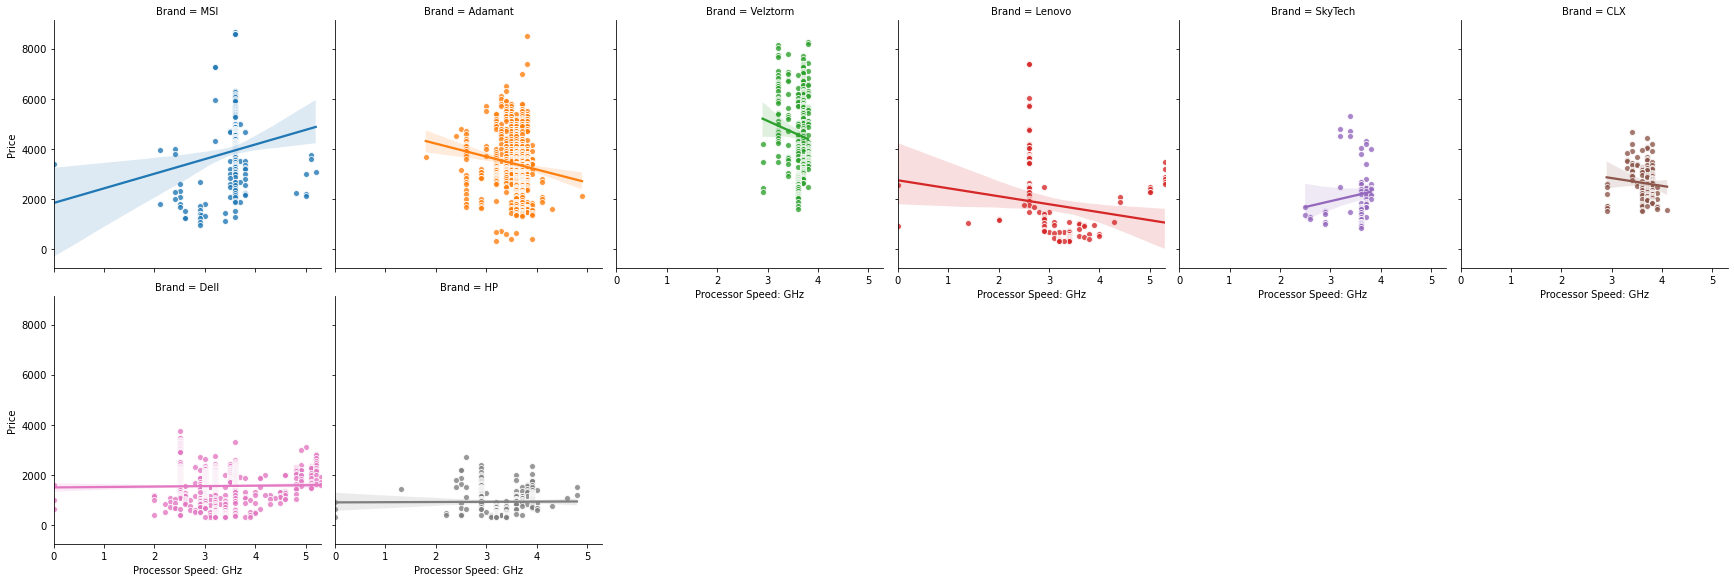

In [401]:
plt.figure(figsize=(20,40))
g = sns.lmplot(
    x='Processor Speed: GHz', y="Price", hue="Brand", col="Brand",
    data=procs_brands_df, scatter_kws={"edgecolor": 'w'}, col_wrap=6, height=4)
plt.show(g)

We can best visualize here that for each brand, the correlation looks different for each, and this usuaully carries with the attribute we plot with Price (particularly Processor Speed).

Lastly, we can get a quick glimpse of any existing influence of ratings on the price. 

In [382]:
procs_brands_df['# Ratings'].dtype #verifying datatype.

dtype('int64')

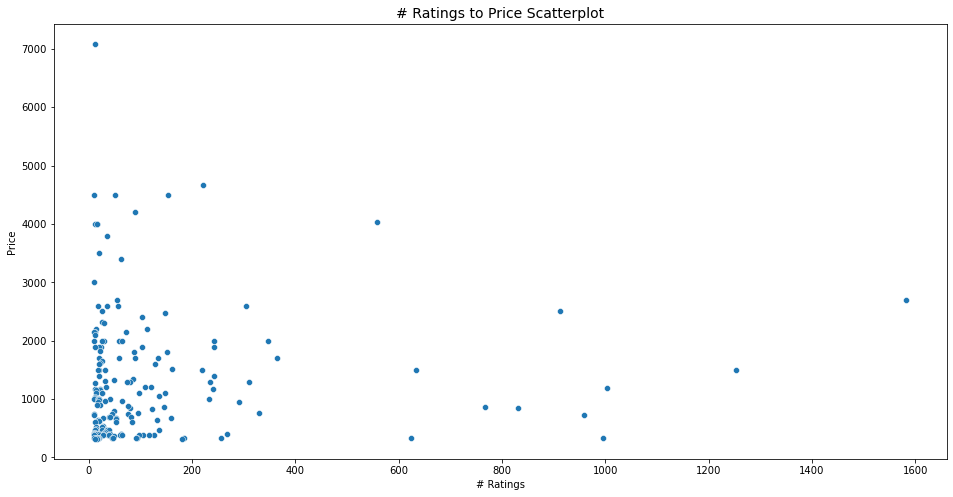

In [383]:
plt.figure(figsize=(16,8)) #In order to fix the view of this graph, we need to filter out records with 0 ratings.
sns.scatterplot(data=procs_brands_df[procs_brands_df['# Ratings']>10], x='# Ratings', y='Price')
plt.title('# Ratings to Price Scatterplot', fontsize=14)
plt.show()

We can see that the relation between price and the # of ratings in our filtered dataframe is quite heteroskedastic. So we know we would need to clean this up too. 

In [384]:
def scale_avg_rating(x):
    splited = x.split('/')
    
    if int(splited[1]) != 0:
        return float(float(splited[0])/float(splited[1]))
    else:
        return float(0.0)

df['Avg. Rating'] = df['Avg. Rating'].apply(scale_avg_rating)

In [385]:
procs_brands_df['Avg. Rating'] = procs_brands_df['Avg. Rating'].apply(scale_avg_rating)

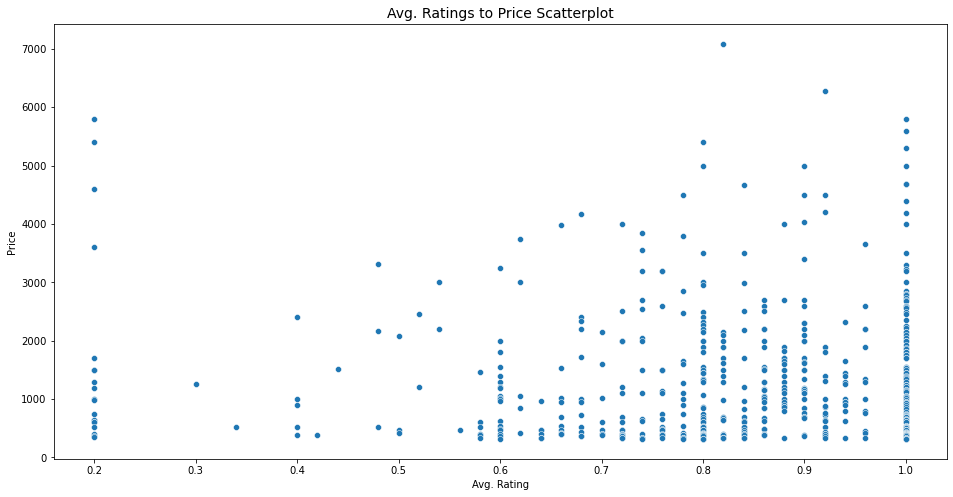

In [386]:

plt.figure(figsize=(16,8)) #In order to fix the view of this graph, we need to filter out records with 0 ratings.
sns.scatterplot(data=procs_brands_df[procs_brands_df['Avg. Rating']>0.0], x='Avg. Rating', y='Price')
plt.title('Avg. Ratings to Price Scatterplot', fontsize=14)
plt.show()

In [387]:
df.dtypes

Product Name             object
Avg. Rating             float64
# Ratings                 int64
Price                   float64
Processor Type           object
Disk Size                object
RAM                      object
Processor Speed          object
Brand                    object
Bluetooth                 int64
Liq. Cooled               int64
RAM: Type                object
RAM : GB                float64
Processor Speed: GHz    float64
Disk Size: GB           float64
dtype: object

## Potential GPU Column:

In [388]:
#df_gpu = df[df['Product Name'].str.contains('GeForce')]

In [389]:
def get_gpu_info(x):
    x = x.lower()
    splited = x.split(' ')  
    
    if 'geforce' in splited:
        return 1
    
    else:
        return 0
        
df['GPU: GeForce'] = df['Product Name'].apply(get_gpu_info)
df['GPU: GeForce']

0       0
1       1
2       1
3       1
4       1
       ..
3800    0
3801    0
3802    0
3803    0
3804    0
Name: GPU: GeForce, Length: 3805, dtype: int64

In [390]:
#df['GPU: GeForce RTX 3000'] = ['GeForce RTX 3000' if 'rtx 3' in value.lower() or 'rtx™ 3' in value.lower() or 'rtx3' in value.lower() else np.nan for value in df['Product Name']]
#df['GPU: GeForce RTX 1000'] = ['GeForce RTX 1000' if 'rtx 1' in value.lower() or 'rtx™ 1' in value.lower() else np.nan for value in df['Product Name']]
#df['GPU: GeForce RTX 2000'] = ['GeForce RTX 2000' if 'rtx 2' in value.lower() or 'rtx™ 2' in value.lower() else np.nan for value in df['Product Name']]

#Perhaps this will get us as many NVIDIA GPUs as we can in a more general sense.

#df['GPU: GeForce GTX 3000'] = ['GeForce GTX 3000' if 'gtx 3' in value.lower() or 'gtx 3' in value.lower() else np.nan for value in df['Product Name']]
#df['GPU: GeForce GTX 1000'] = ['GeForce GTX 1000' if 'gtx 1' in value.lower() or 'gtx 1' in value.lower() else np.nan for value in df['Product Name']]
#df['GPU: GeForce GT 700'] = ['GeForce GTX 700' if 'gt 7' in value.lower() or 'gt 7' in value.lower() else np.nan for value in df['Product Name']]

It would be virtually impractical to try and pull any GPU information from the Product Info given how convoluted the product names are in the listings on Amazon.

There simply isn't a practical way to get other information from the product name or an efficent way of obtaining other information from product listings pages. I could for now try to list products that have an NVIDIA GeForce GPU.

In [391]:
df['GPU: GeForce'].value_counts()

0    2106
1    1699
Name: GPU: GeForce, dtype: int64

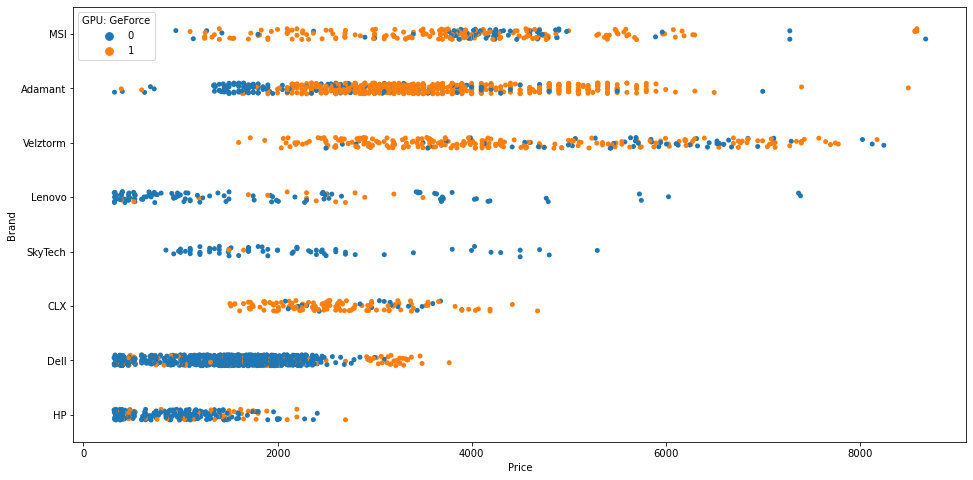

In [392]:
temp_df = df[df['Processor Type'].isin(common_procs)]
temp_df = temp_df[temp_df['Brand'].isin(chosen_brands)]

plt.figure(figsize=(16,8))
sns.stripplot(data=temp_df, x='Price', y='Brand', hue='GPU: GeForce')
plt.show()

There doesn't seem to be much difference between Price and Brand with this added GPU column anyway. So it seems negligible.

In [393]:
df.drop(columns=['GPU: GeForce'], inplace=True)

In [394]:
df.head()

,Product Name,Avg. Rating,# Ratings,Price,Processor Type,Disk Size,RAM,Processor Speed,Brand,Bluetooth,Liq. Cooled,RAM: Type,RAM : GB,Processor Speed: GHz,Disk Size: GB
0,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0,0,8679.0,Intel Core i7,8 TB,64 GB,3.60 GHz,MSI,0,0,GB,64.0,3.6,8000.0
1,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0,0,8589.0,Intel Core i7,16 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,16000.0
2,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0,0,8589.0,Intel Core i7,8 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,8000.0
3,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0,0,8569.0,Intel Core i7,16 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,16000.0
4,MSI Aegis RS 12TG-261 Gaming & Entertainment D...,0.0,0,8569.0,Intel Core i7,8 TB,64 GB,3.60 GHz,MSI,1,0,GB,64.0,3.6,8000.0


In [395]:
df.to_csv("amazon_gaming_desktops_posteda.csv")

## Closing Remarks:

* There are a lot of outliers in the data currently. In our model building phase, we will have to phase out as many outliers as we can in order to ensure a reliable linear model can be made.


* It seems the biggest influencer by far on Price is the Brand of computer. Therefore, we can infer with confidence that there are brands that exist that price their computers higher even with similar specs as other computers from other brands.


* Since some categorical variables we have exhibit high cardinality, we'll have to possibly cut out records that are among these columns in order to hone in on data germane to model building.


* We can infer based on these insights that if looking to buy a gaming computer from the market, the brand/maker has a very large influence on the price compared to a change in specs. Of course you can still expect a price increase if you search for a computer with high RAM or a more high-end processor.